# IBM Applied Data Science Capstone Project

### This capstone project will give you a taste of what data scientists go through in real life when working with data. It uses the location data and different location data providers, such as Foursquare. This project demonstrates about how to make RESTful API calls to the Foursquare API to retrieve data about venues in different neighborhoods around the world. During the project, I have learn how to be creative in situations where data are not readily available by scraping web data and parsing HTML code. I have utilized Python and its pandas library to manipulate data, which helped me to refine my skills for exploring and analyzing data. Finally, I have used the Folium library to great maps of geospatial data and to communicate my results and findings.

## Import all the necessry libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes

# convert an address into latitude and longitude values
#from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#Install and import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                       

## Use Foursquare Client ID and Secret

In [4]:
# your Foursquare ID
CLIENT_ID = 'YURAW5R5XNEOB3HBPIL1TKN4MB2HM2VBXGPFEZATUZ2K23K1'
# your Foursquare Secret
CLIENT_SECRET = 'BG0ZCMUVHPLYEZZCOF4A3YBG0HERLP5UYLOJDJNUZRZA2SBZ'
VERSION = '20202204'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YURAW5R5XNEOB3HBPIL1TKN4MB2HM2VBXGPFEZATUZ2K23K1
CLIENT_SECRET:BG0ZCMUVHPLYEZZCOF4A3YBG0HERLP5UYLOJDJNUZRZA2SBZ


## Install geopy and import Nominatim to convert address into latitude & longitude

In [2]:
!conda install -c conda-forge geopy --yes

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          92 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0   conda-forge
    geopy:         1.21.0-py_0 conda-forge


geopy-1.21.0         | 58 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


## Give the city name and use Nominatim to find the latitude & longitude

In [20]:
# define the city and get its latitude & longitude 

address = 'Bandra, Mumbai'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate : {}, {}.'.format(latitude, longitude))

The geograpical coordinate : 19.0549792, 72.8402203.


In [21]:
neighborhood_latitude = 19.0549792
neighborhood_longitude = 72.8402203

In [48]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius
#search_query = 'Hotel'
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    #search_query,
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=YURAW5R5XNEOB3HBPIL1TKN4MB2HM2VBXGPFEZATUZ2K23K1&client_secret=BG0ZCMUVHPLYEZZCOF4A3YBG0HERLP5UYLOJDJNUZRZA2SBZ&v=20202204&ll=19.0549792,72.8402203&radius=1000&limit=100'

In [49]:
# results display is hidden for report simplification 
results = requests.get(url).json()
print ("Results\n", results)

Results
 {'meta': {'code': 200, 'requestId': '5eae1708b9a389001e565009'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}]}, 'headerLocation': 'Bandra West', 'headerFullLocation': 'Bandra West, Mumbai', 'headerLocationGranularity': 'neighborhood', 'totalResults': 71, 'suggestedBounds': {'ne': {'lat': 19.063979209000006, 'lng': 72.84972426788295}, 'sw': {'lat': 19.04597919099999, 'lng': 72.83071633211705}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4e4288c51495179c014f7328', 'name': 'Coalz', 'location': {'address': 'B-50, near bandra residency', 'crossStreet': 'bandra west', 'lat': 19.05646827674503, 'lng': 72.83915374587166, 'labeledLatLngs': [{'label': 'display', 'lat': 19.05646827674503, 'lng': 72.83915374587166}], 'distance': 200, 'cc': 'IN

In [50]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Venues into Dataframe

In [55]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
# Venues near current Singapore residence place
nearby_venues.head(10)

,name,categories,lat,lng
0,Coalz,Café,19.056468,72.839154
1,National Restaurant,Indian Restaurant,19.056546,72.839141
2,Escobar,Lounge,19.060177,72.836446
3,Golconda Bowl,Indian Restaurant,19.055977,72.834189
4,Heng Bok,Korean Restaurant,19.059163,72.837547
5,Chocolateria San Churro,Dessert Shop,19.061918,72.834480
6,MIG Cricket Club,Sports Club,19.057461,72.847706
7,Godrej Nature's Basket,Gourmet Shop,19.055509,72.831935
8,Persian Darbar,Indian Restaurant,19.060323,72.836481
9,Nature's Basket,Gourmet Shop,19.055533,72.831778


In [56]:
nearby_venues.shape

(71, 4)

## Generate map to visualize 

In [58]:
# Bandra, Mumbai : Latitude and Longitude
latitude=19.0549792
longitude = 72.8402203

# create map of place  using latitude and longitude values
g_map = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(g_map)  
    
g_map

## MANHATTAN NEIGHBORHOODS - DATA AND MAPPING

### The list of Manhattan neighborhoods is worked out during LAB exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'mh_neigh_data.csv' and 'manhattan_merge.csv' has the following below data structure.

In [77]:
# The code was removed by Watson Studio for sharing.

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels
0,Manhattan,Marble Hill,40.876551,-73.910660,2
1,Manhattan,Chinatown,40.715618,-73.994279,2
2,Manhattan,Washington Heights,40.851903,-73.936900,4
3,Manhattan,Inwood,40.867684,-73.921210,3
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0
5,Manhattan,Manhattanville,40.816934,-73.957385,3
6,Manhattan,Central Harlem,40.815976,-73.943211,2
7,Manhattan,East Harlem,40.792249,-73.944182,4
8,Manhattan,Upper East Side,40.775639,-73.960508,0
9,Manhattan,Yorkville,40.775930,-73.947118,2


## Manhattan Borough neighborhoods
### Data with top venues


In [78]:
body = client_09aac778b57d42f2a3f89dd160133d1c.get_object(Bucket='datascience-donotdelete-pr-ku7h6sj7wlfz9e',Key='manhattan_merged.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,2,Coffee Shop,Discount Store,Yoga Studio,Steakhouse,Supplement Shop,Tennis Stadium,Shoe Store,Gym,Bank,Seafood Restaurant
1,Manhattan,Chinatown,40.715618,-73.994279,2,Chinese Restaurant,Cocktail Bar,Dim Sum Restaurant,American Restaurant,Vietnamese Restaurant,Salon / Barbershop,Noodle House,Bakery,Bubble Tea Shop,Ice Cream Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Mobile Phone Shop,Pizza Place,Sandwich Place,Park,Gym,Latin American Restaurant,Tapas Restaurant,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,3,Mexican Restaurant,Lounge,Pizza Place,Café,Wine Bar,Bakery,American Restaurant,Park,Frozen Yogurt Shop,Spanish Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Mexican Restaurant,Coffee Shop,Café,Deli / Bodega,Pizza Place,Liquor Store,Indian Restaurant,Sushi Restaurant,Sandwich Place,Yoga Studio


### Longitude and Latitude of the Manhattan

In [81]:
address = 'Manhattan'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan: {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan: 40.7896239, -73.9598939.


In [121]:
# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7896239
longitude= -73.9598939

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
  # add markers for rental places to map
for lat, lng, label in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

In [122]:

## kk is the cluster number to explore
kk = 2
df_data_2.loc[df_data_2['Cluster Labels'] == kk, df_data_2.columns[[1] + list(range(5, df_data_2.shape[1]))]]

,Neighborhood
0,Marble Hill
1,Chinatown
6,Central Harlem
9,Yorkville
14,Clinton
23,Soho
26,Morningside Heights
34,Sutton Place
39,Hudson Yards


## Places in the Manhattan for rent

In [103]:
body = client_09aac778b57d42f2a3f89dd160133d1c.get_object(Bucket='datascience-donotdelete-pr-ku7h6sj7wlfz9e',Key='MH_flats_price.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,NaN,NaN
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,NaN,NaN
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,NaN,NaN
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,NaN,NaN
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,NaN,NaN


## Longitude and Latitude of the places which is available for the rent in Manhattan

In [105]:
body = client_09aac778b57d42f2a3f89dd160133d1c.get_object(Bucket='datascience-donotdelete-pr-ku7h6sj7wlfz9e',Key='MH_rent_latlong.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Address,Area,Price_per_ft2,Rooms,Area-ft2,Rent_Price,Lat,Long
0,West 105th Street,Upper West Side,2.94,5.0,3400,10000,40.799771,-73.966213
1,East 97th Street,Upper East Side,3.57,3.0,2100,7500,40.788585,-73.955277
2,West 105th Street,Upper West Side,1.89,4.0,2800,5300,40.799771,-73.966213
3,CARMINE ST.,West Village,3.03,2.0,1650,5000,40.730523,-74.001873
4,171 W 23RD ST.,Chelsea,3.45,2.0,1450,5000,40.744118,-73.995299


## Analyze the Price of the places 

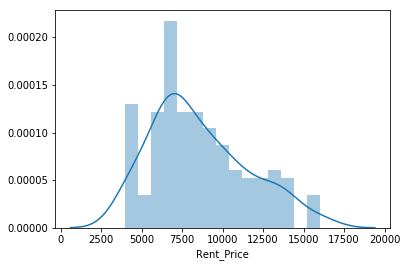

In [107]:
import seaborn as sns
sns.distplot(df_data_4['Rent_Price'],bins=15)

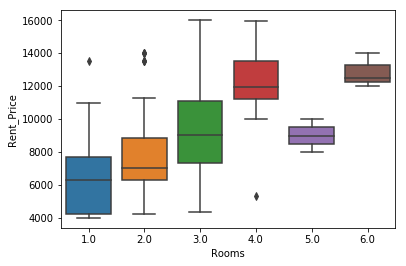

In [111]:
sns.boxplot(x='Rooms', y= 'Rent_Price', data=df_data_4)

In [114]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(df_data_4['Lat'], df_data_4['Long'],'$ ' + df_data_4['Rent_Price'].astype(str)+ ',  '+ df_data_4['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan) 
    

map_manhattan

In [116]:

# create map of Manhattan using latitude and longitude values from Nominatim
latitude= 40.7308619
longitude= -73.9871558

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_data_2['Latitude'], df_data_2['Longitude'], df_data_2['Neighborhood'], df_data_2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(df_data_4['Lat'], df_data_4['Long'],'$ ' + df_data_4['Rent_Price'].astype(str)+ df_data_4['Address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_manhattan.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_manhattan)

map_clusters2